# Linear Regression - Chemical examples

This notebook will take you through some regression examples with some recently published data so you can see how regression can be useful in your research, and will teach you the regression and demonstrate how you use regression in actual research.

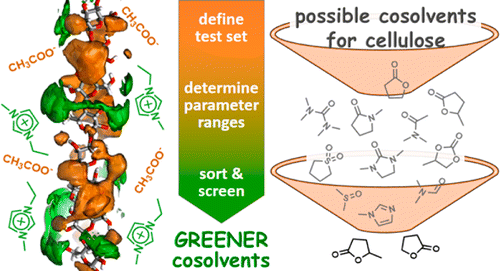

**The chemical problem** Cellulose is a readily available material that can be used to make useful biodegradable materials from waste materials (like bagasse, the husks of sugar cane left over after processing). However the first stage of processing is to dissolve cellulose which is very difficult. Currently, liquid salts called ionic liquids (IL) are used to do this (which are nice solvents in terms of green chemistry as they have no vapour pressure so can be recovered, but they are horrible solvents to handle). Ionic liquids are(very!)  expensive, and the resulting cellubiose-ionic liquid mixture is very thick and hard to process. The solution to both these problems is to dilute the ionic liquid with a co-solvent (CS), and the mixture of ionic liquid and co solvent is called an organic electrolyte solutions (OES). 

In this notebook, we will look at data which will help us figure out which CS are the best and why. Any small improvement in cellulose processing is worth billions of dollars due to increasing the efficiency of the paper and biodegradable plastics industries. Furthermore, this work can be used to switch co-solvents for safer or greener options.

**Materials**
1-Ethyl-3-methylimidazolium acetate (>95% purity, Sigma-Aldrich) and microcrystalline cellulose (Sigma-Aldrich, 20 μm particle size) were dried at 80 °C under reduced pressure to constant mass. Dipolar aprotic solvents (all >99% purity, Sigma-Aldrich) were used as received, except for sulfolane, which was dried over activated 3 Å molecular sieves. The water content of the ionic liquid and solvents was measured by Karl Fisher titration and found to be: [EMIm][OAc] 1.1%; 1-methylimidazole 0.2%; dimethyl sulfoxide 1.1%; N,N-dimethylformamide 0.3%; N,N′-dimethylimidazolidinone 0.7%; N,N-dimethylacetamide 0.4%; sulfolane 0.1%; propylene carbonate 0.1%; γ-valerolactone 0.8%; N,N,N′,N′-tetramethylurea 0.3%; N-methylpyrrolidinone 0.8%; and γ-butyrolactone 0.3%.

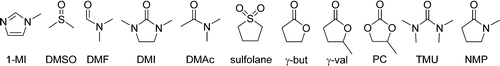

**Solubility Tests**
Solubility tests were conducted at 70 °C. As the cellulose solutions formed are viscous and not amenable to filtration, solubility was determined by addition of small aliquots of dried microcrystalline cellulose (MC) to mixtures of [EMIm][OAc]/cosolvent of appropriate composition. The maximum amount of MC that dissolved, a, and minimum amount that did not dissolve, b, were recorded, giving an under- and overestimate for the maximum amount of MC dissolvable, v. Repeated determinations, using smaller incremental added weights of MC then led to a narrow range between “soluble” and “insoluble”. (As MC tended to form aggregates when added directly to OESs, a slightly modified procedure was followed once approximate solubility values were known at any given OES composition: to a weighed quantity of dried MC was added a measured quantity of the selected cosolvent; after stirring for 1 min to wet and disperse the MC powder, calculated quantities of IL were added, and then, small, weighed aliquots were added until no further MC would dissolve.) Apparently “insoluble” samples were maintained for a minimum of 16 h at 70 °C to confirm the lack of further dissolution.
Each pair of points (ai, bi) was given a weight, wi,:
(1)
based on, vi, the errors on ai and bi, as given by vi = (bi– ai)/2, such that the uncertainties on points ai and bi are ai+ vi and bi– vi respectively. Other sources of error are much smaller in comparison.

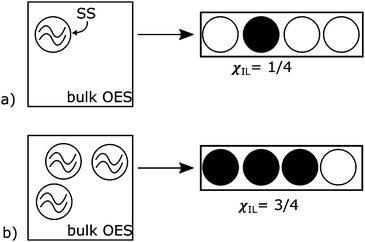

Fig 2. An explanation of mole fraction. Cellubiose is surrounded by a solvent shell (SS). There is only so much cellulose that can fit into the OEX. We normalise this data such  that the maximum amount of cellubiose that can be dissolved (in pure ionic liquid) is 1.

The mole fraction of ionic liquid in the OES mixture, $\chi_{IL}$, is calculated for each mixture ($\chi_{IL}=1$ is pure ionic liquid, $\chi_{IL}=0$ is pure co-sovlent. The weight percentage of dissolved cellulose was measured: literally very small amounts of nanocrystalling cellulose was weighed out very carefully and put into the OES to see if it dissolved. You'll notice that there appears to be over and under points, the lower values are the last measurement of cellulose that dissolved, the higher values are the first measurement that did not dissolve. These experiments were very fiddly and time consuming to do, so we must respect the data (and the hardworking PhD student who did these experiments!). 

From the weight percentage, the mole fraction of the cellubiose repeat unit, $\chi_{cell}$ was calculated to get the plots below.[1]

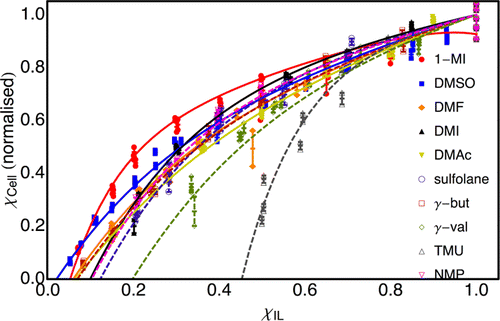

Things to note: 
* Most the curves seem to have roughly the same sort of shape
* Some curves look a little different to the rest, look at the shape of 1-MI
* The point where these curves cross the x-axis is the molar fraction of solvent required before any of the cellulose will dissolve. An ionic liquid-DMSO OES only requires about 0.08 or 8% by mole of ionic liquid for some of the cellulose to be dissolved, whereas TMU requires ~0.48 (48% by mole) of ionic liquid before any cellulsoe will dissolve. What is the cause of this difference? 

**The Task**

We're going to try and understand which aspects of the co-solvents causes this different behaviour, fit the curves and come up with a models for the typical OESs (like DMI) and the atypical OESs (like 1MI).

**References for this data:**

[1] Ella Gale, Remigius H. Wirawan, Rodrigo L. Silveira, Caroline S. Pereira, Marcus A. Johns, Munir S. Skaf and Janet L. Scott, "Directed Discovery of Greener Cosolvents: New Cosolvents for Use in Ionic Liquid Based Organic Electrolyte Solutions for Cellulose Dissolution," *ACS Sustainable Chem. Eng.*, 2016, **4**, 11, 6200--6207
Publication Date:September 28, 2016
https://doi.org/10.1021/acssuschemeng.6b02020

[2] Gale, E. M., Johns, M. A., Wirawan, R. H., & Scott, J. L. (2017). "Combining random walk and regression models to understand solvation in multi-component solvent systems." *Physical Chemistry Chemical Physics*, **19**(27), 17805-17815. https://doi.org/10.1039/c7cp02873c

[3] Catalán, J. Towards a Generalised Treatament of the Solvent Effect Based on Four Empirical
Scales: Dipolarity (SdP, a New Scale), Polarizability (SP), Acidity (SA), and Basicity (SB) of the
Medium, *J. Phys. Chem. B* 2009, **11**, 5951-5960.

[4] Laurence, C.; Legros, J.; Chantzis, A.; Planchat, A.; Jacquemin, D. A Database of DispersionInduction DI, Electrostatic ES, and Hydrogen Bonding α1 and β1 Solvent Parameters and Some Applications to the Multiparameter Correlation Analysis of Solvent Effects. *J. Phys. Chem.* B 2015, **119**, 3174-3184. 

## Contents

In [1]:
# first we import some useful libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

**Linear regression practice:** 
Which solvent parameter explains most the variance? R2 practice

**Non-linear fitting**
Does our model fit the data? Linearising non-linear data

**Linear vs ridge regression** 
What explains the difference between co-solvents?

**Polynomial regression model**
Fitting more complicated models for the outlyers


to-do list:
add in cellulose /cellubiose structures 

## Investigation of the data

Plot and explain the data 

In [2]:
# This sets up a list of strings which are the names of our solvents
SolventNameList = ["1MI", "DMSO", "DMF", "DMI", "DMAc", "sulfolane", "gbut", "gval", "TMU", "NMP", "PC"]

In [3]:
# read data into a DataFrame
chi1MI = pd.read_csv("./tutorialdata/chichi1MI.csv")
chiDMSO = pd.read_csv("./tutorialdata/chichiDMSO.csv")
chiDMF = pd.read_csv("./tutorialdata/chichiDMF.csv")
chiDMI = pd.read_csv("./tutorialdata/chichiDMI.csv")
chiDMAc = pd.read_csv("./tutorialdata/chichiDMAc.csv")
chisulfolane = pd.read_csv("./tutorialdata/chichisulfolane.csv")
chigbut = pd.read_csv("./tutorialdata/chichigbut.csv")
chigval = pd.read_csv("./tutorialdata/chichigval.csv")
chiTMU = pd.read_csv("./tutorialdata/chichitmu.csv")
chiNMP = pd.read_csv("./tutorialdata/chichinmp.csv")
chiPC = pd.read_csv("./tutorialdata/chichiPC.csv")


chi1MI.head()

,chi_IL,chi_cell
0,0.069929,0.098819
1,0.070851,0.100230
2,0.150636,0.322374
3,0.152858,0.312512
4,0.151703,0.333593


### Put the data into a DataFrame

### Asside on strings and exec

*Advanced coding skillz!* I'm bored of typing in all the commands for each solvent as I did above.  You may have noticed that the 11 lines of code above only differ by the solvent names. We could copy the line to make c1MI and just fill in the solvents by hand, but that's boring. So, instead we'll autogenerate the commands by adding togther strings and then use `exec` for execute to run them. This allows us to write computer code that writes computer code! :) 

Don't worry if you do not understand this bit, I'm just using this to set up the data. 

Strings are added together like this: `"hello " + "world"`, try it:

We can get strings out of a list of strings by indexing them, try to get the string for DMSO out of the `SolventNameList` above

And we can execute strings like this: 

exec("4 + 4")

In [4]:
"4+4"

'4+4'

In [5]:
exec("4+4")

### setting up several dataframes

This code sets up the DataFrames. Just run this bit, don't worry about understanding it right now. 

In [6]:
for i in range(len(SolventNameList)):
    my_string =  "c" + SolventNameList[i] + " = pd.DataFrame(chi" + SolventNameList[i] + ")"
    print(my_string)
    exec(my_string)

c1MI = pd.DataFrame(chi1MI)
cDMSO = pd.DataFrame(chiDMSO)
cDMF = pd.DataFrame(chiDMF)
cDMI = pd.DataFrame(chiDMI)
cDMAc = pd.DataFrame(chiDMAc)
csulfolane = pd.DataFrame(chisulfolane)
cgbut = pd.DataFrame(chigbut)
cgval = pd.DataFrame(chigval)
cTMU = pd.DataFrame(chiTMU)
cNMP = pd.DataFrame(chiNMP)
cPC = pd.DataFrame(chiPC)


Let's have a look at one of the datasets

In [7]:
chi1MI.head()

,chi_IL,chi_cell
0,0.069929,0.098819
1,0.070851,0.100230
2,0.150636,0.322374
3,0.152858,0.312512
4,0.151703,0.333593


SolventNameList

In [8]:
SolventNameList

['1MI',
 'DMSO',
 'DMF',
 'DMI',
 'DMAc',
 'sulfolane',
 'gbut',
 'gval',
 'TMU',
 'NMP',
 'PC']

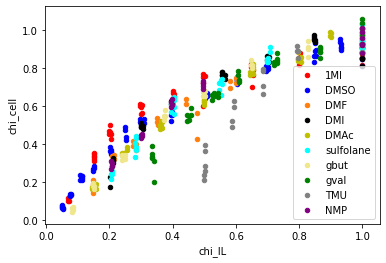

In [9]:
ax=chi1MI.plot.scatter("chi_IL","chi_cell", c='r', label='1MI')
chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', ax=ax, label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')
chisulfolane.plot.scatter("chi_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
chigbut.plot.scatter("chi_IL","chi_cell", c='khaki', ax=ax, label='gbut')
chigval.plot.scatter("chi_IL","chi_cell", c='g', ax=ax, label='gval')
chiTMU.plot.scatter("chi_IL","chi_cell", c='gray', ax=ax, label='TMU')
chiNMP.plot.scatter("chi_IL","chi_cell", c='purple', ax=ax, label='NMP')

Messy! Lets just plot the typical curves~}

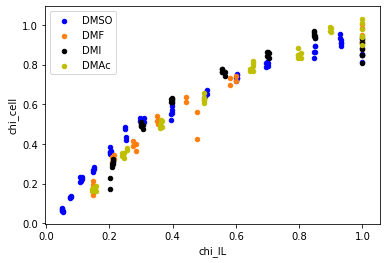

In [10]:
ax=chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')

At the moment, the different OES systems look vastly different. They cross the x-axis in different places, i.e. the different systems require more ionic liquid to start dissolving the cellulose, the curves also have different shapes and curvature.

If we are able to understand these systems and explain what is happening here, we should have the knowledge to replot these data such that all the OES's overlap, and then the best fit line to that would be the explanation for why the different co-solvents cause different behaviour. And from that, we should be able to predict other solvents and other systems. 

# 1. Linear Regression - finding out how many IL pairs there are per cellubiose residue

# 1. Linear Regression - Fitting co-solvent efficiencies to solvent properties

We want to try and find out which chemical characteristics of the solvents could explain this behaviour. Before fitting the lines, lets look at hte behaviour of the OESs as a series. As each OES was tested over the entire range of ionic liquid molar fraction, we can take the area under the curve to give us a rough measure of the 'goodness' of the co-solvents, this is the maximum efficiency measure. These rough measures can then be screened against several chemical characteristics to see which ones might be involved in explaining the different between the cosolvents. Note, for this exercise, we're only doing the first 10 solvents (excluding PC). 

In [11]:
SolventNameList[0:10]

['1MI',
 'DMSO',
 'DMF',
 'DMI',
 'DMAc',
 'sulfolane',
 'gbut',
 'gval',
 'TMU',
 'NMP']

We have a couple of measures of efficiency: 
* `max_efficiency measure`
* `chi_IL_max_efficieny` which is the $\chi_{IL}$ required in the best OES mixture for that co-solvent, this is the point where we're getting the most cellubiose dissolution for the each mole IL (i.e. the point you'd want to run your processes at
* `min_chi_IL` is where the curves above cross the x-axis, i.e. the minimum amount of IL required to get any dissoluiont at all

In [12]:
max_efficiency = np.array([0.168,0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])
min_chi_IL = np.array([0.052, 0.019,0.058,0.096,0.056,0.115,0.065,0.184,0.451,0.100])
chi_IL_max_efficiency = np.array([0.168, 0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])

### Put the data into a DataFrame

In [13]:
efficiency={'max_efficiency': max_efficiency, 'min_chi_IL': min_chi_IL, 'chi_IL_max_efficiency': chi_IL_max_efficiency }

In [14]:
# Create pandas dataframe to store our X and y values
eff = pd.DataFrame(efficiency)

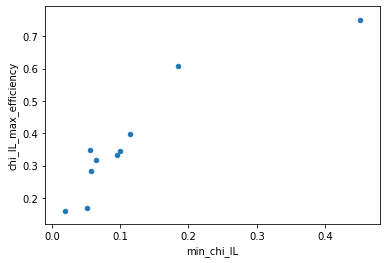

In [15]:
ax=eff.plot.scatter("min_chi_IL","chi_IL_max_efficiency")

Let's make a model and call is min_max_eff and set it up to do linear regression

In [16]:
min_max_eff = LinearRegression(fit_intercept=True)

Now fit the model

In [17]:
min_max_eff.fit(eff[["min_chi_IL"]], eff[["chi_IL_max_efficiency"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

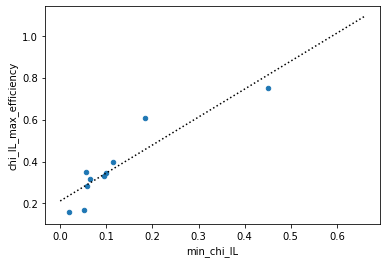

In [18]:
xfit = np.linspace(0, 0.66)
yfit = min_max_eff.predict(xfit[:, np.newaxis])

ax = eff.plot.scatter("min_chi_IL", "chi_IL_max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")

In [19]:
print("Model gradient: ", min_max_eff.coef_[0])
print("Model intercept:", min_max_eff.intercept_)

Model gradient:  [1.33495341]
Model intercept: [0.21193957]


In [20]:
min_max_eff.score(eff[["min_chi_IL"]], eff["chi_IL_max_efficiency"])

0.8305600824319893

Ok, now lets see how if the other limiting quantities of OES vary with respect to each other

Model gradient:  [1.]
Model intercept: [-5.55111512e-17]


1.0

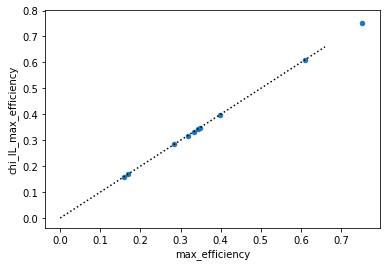

In [21]:
min_max_eff.fit(eff[['max_efficiency']], eff[["chi_IL_max_efficiency"]])
xfit = np.linspace(0, 0.66)
yfit = min_max_eff.predict(xfit[:, np.newaxis])

ax = eff.plot.scatter('max_efficiency', "chi_IL_max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")
print("Model gradient: ", min_max_eff.coef_[0])
print("Model intercept:", min_max_eff.intercept_)
min_max_eff.score(eff[['max_efficiency']], eff["chi_IL_max_efficiency"])

Model gradient:  [1.33495341]
Model intercept: [0.21193957]


0.8305600824319893

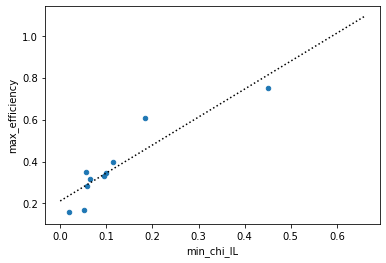

In [22]:
min_max_eff.fit(eff[["min_chi_IL"]], eff[['max_efficiency']])
xfit = np.linspace(0, 0.66)
yfit = min_max_eff.predict(xfit[:, np.newaxis])

ax = eff.plot.scatter("min_chi_IL", 'max_efficiency')
ax.plot(xfit, yfit, linestyle=":", color="black")
print("Model gradient: ", min_max_eff.coef_[0])
print("Model intercept:", min_max_eff.intercept_)
min_max_eff.score(eff[["min_chi_IL"]], eff[['max_efficiency']])

So what have you found? 

The max efficiency measure is entirely explained by the $\chi_{IL}$ max efficiency. How good the OES is at dissolving cellulose at the most efficient point is entirely determined by the amount of IL in that mixture, i.e. the co-solvents are not aiding the disslution chemically, which we expect (and knew writing the paper) as it is only the IL that does the dissolution. 

Now, what we want to explain is what it is about the co-solvents that determines the `chi_max_efficiency`, as this the value we care about. We can see from the data that our best two solvents are DMSO and 1-MI and our worst two are g-val and TMU. 

# 3. Non-linear fitting - part 2: Comparing linear and higher order fits

One thing that varies about this curve is the point at which the cellulose starts to dissolve, i.e. where it crosses the x-axis. This is the minimum mole fraction of ionic liquid required to get any dissolution at all. So, different co-solvents require different amounts of IL in the mixture to do anything at all. For example, TMU is a bad co-solvent, DMI is a good one.

Looking at the chemical structures, we can see that TMU is not a ring, and had 4 methyl groups that can spin and pivot around taking up space. DMI is the ring version of TMU, and being a ring the methyls and CH2 hydrogens are much more constrained. Note also that the other very good co-solvents are 1-MI and DMSO are small molecules.

Perhaps the different behaviour of the OESs is related to the volume of the co-solvents?

To find out we take as our input is the minimum ionic liquid molar fraction X (the Greek letter 'chi' is used for molar fraction in the chemical literature), called `chiIL_min` below. Our target output is the molar volume of the co-solvent (`vol_m` below), which is a value we can look up. 

This is the data:

In [23]:
vol_m = np.array([71.3, 82.4, 107.3, 122.6, 96.44, 76.8, 82.63, 
  95.27, 93.02, 96.2, 85.])
chiIL_min = np.array([0.026125, 0.046998, 0.136876, 
  0.413974, 0.04399, 0.04875, 
  0.05349, 0.0675487, 0.07219, 
  0.13881,0.1341])

### Put the data into a DataFrame

In [24]:
data={'molar volume': vol_m, 'minimum chi ionic liquid': chiIL_min}

In [25]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(data)

In [26]:
# Show the first five rows of our dataframe
df.head()

,molar volume,minimum chi ionic liquid
0,71.30,0.026125
1,82.40,0.046998
2,107.30,0.136876
3,122.60,0.413974
4,96.44,0.043990


### Plot the data

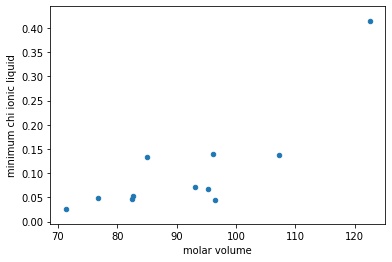

In [27]:
df.plot.scatter("molar volume", "minimum chi ionic liquid")

*Now the question is is this best fit by a straight line or a curve?*

### Fit the data to a straight line and get the residuals

In [28]:
# instantiate the model
model = LinearRegression(fit_intercept=True)
# set up fit the model to the data
model.fit(df[["molar volume"]], df["minimum chi ionic liquid"])
# set up x
xfit = np.linspace(70, 130)
# predict y
yfit = model.predict(xfit[:, np.newaxis])

### Plot the fit

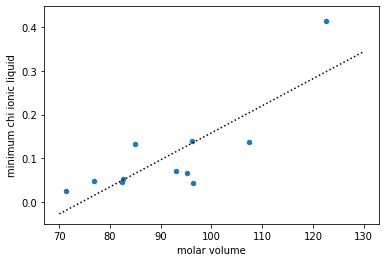

In [29]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2linear

In [30]:
R2linear = model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

In [31]:
print("R2 for the linear fit is: {}".format(R2linear))

R2 for the linear fit is: 0.6671587782964709


### Fit the data to a curve line and get the residuals

In [32]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(df[["molar volume"]],df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)
# predict y
yfit = poly_model.predict(xfit[:, np.newaxis])

### Plot the fit

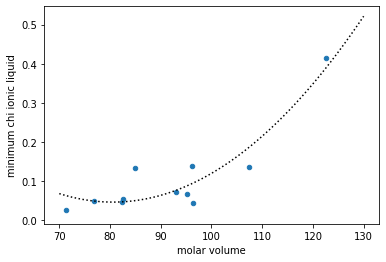

In [33]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2Curve

In [34]:
R2curve = poly_model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

### Results:

In [35]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}\n".format(R2curve))
if R2linear > R2curve:
    print("The linear fit is better")
elif R2linear < R2curve:
    print("The curved fit is better")
else:
    print("You've made a mistake, probably not setting R2curve.")


The linear fit R2 score is: 0.6671587782964709
The curve fit R2 score is: 0.8626575620820776

The curved fit is better


*By eye, and from the residuals, you can probably tell which fit is the better one.*

## Overfitting

Is it the case that a better R2 score is always better?

There is a the concept of **overfitting** your data, which we are going to try now.

### This time, use 7 polynomial features to fit the data to a curve line and get the residuals

In [36]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_model.fit(df[["molar volume"]],df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)
# predict y
yfit = poly_model.predict(xfit[:, np.newaxis])

### Plot the fit

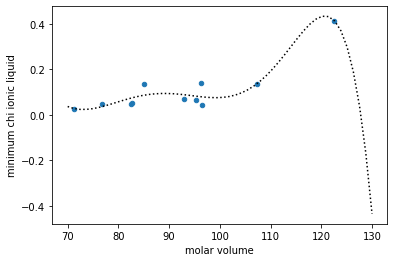

In [37]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

In [38]:
R2overfit = poly_model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

### Results:

In [39]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}".format(R2curve))
print("The curve fit R2 score is: {}".format(R2overfit))

The linear fit R2 score is: 0.6671587782964709
The curve fit R2 score is: 0.8626575620820776
The curve fit R2 score is: 0.9268359712253263


**Regression Conclusion**

*Overfitting* 
Look at the three graphs you've plotted, which fit seems the best? 

Just adding more features is not the best way to fit data. Generally, you want the fitting equation to be as simple as possible, but no simpler. With this data, the linear fit is the simplest, but not the most informative. The quadratic fit is a good mix of explanation (it explains 86% of the variance after all) and usefulness. The 7-featured polynomial fit is overfitting the data.

*How do we find out which fit is the best?*
One method would be to get more data, if possible, if we were to measure another co-solvent with a molar volume larger than TMU we could see if it is closer to the quadratic or linear fit. If we cannot measure more data (for example, in the chemical sciences there may not be another solvent with similar properties but a larger molar volume) then we use the **leave one out** approach, which is exactly what it sounds like, you remove one of the points and do the fits and see how well the fitted equation predicts the value you left out. 

*Is there a general rule of thumb?*
If you have a theory that is predicting something relevant about your data, then obviously fit your data to that equation. Overwise, stick with the simpler fits. Never use a fit with more features than the number of datapoints, and generally less than 3 or 4. 

**Chemistry Conclusion**

In the paper[2] this data comes from the quadratic fit was plotted, as there is no theoretical reason why the fit should have that shape, this was presented as an experimental observation. However, a major factor in the quadratic fit comes down to whether TMU is part of the trend, in which case the quadratic trend is best, but if TMU is an outlier then a straight line through the remaining points would be a good fit. 

The fact that molar volume can be used to explain around 80% of why different co-solvents require different molar fractions of ionic liquid to start dissolving cellulose suggests that the volume of the molecules will be important in explaining this process.

In the section [[4?]] we're going to continue with the insight that the co-solvent molar volume is important and try to explain what the co-solvents are doing.

# 3. Linear fitting exercises

**Exercise 1:**

**Paper [2] has the following theory to explain the behaviour of these OESs**

$n_{cell} = d + m \sqrt{\, n_{IL}}$

where $n_{cell}$ is the number of cellubiose residues in solution, $n_{IL}$ is the number of ionic liquid pairs in solution and d and m are fitting parameters. By linearising your data, can you calculate m and d for DMSO, DMAc, TMU and PC. Report the R2 values. Start with the `chi_IL` and `chi_cell` data. Which cosolvents follow the theory well and which do not? 

In [288]:
Avogradro = scipy.constants.physical_constants['Avogadro constant'][0]

**Exercise 2.** 

**Calculate the number of ionic liquid pairs required to dissolve each extra cellubiose residue. How many ionic liqiud pairs are there per cellubiose residue in pure ionic liquid?**


Tip: Every extra cellubiose residue requires a constant amount of ionic liquid pairs around it to hold it in solution (see figure 1 left).  Start with the `chi_IL` and `chi_cell` data.

# 3. Multivariate Linear Regression

So we've done quite a lot of single dimension linear regressions now. And we've found out that molar volume is quite important for explaining the minimum_chi_IL. Let's now try to see if we can explain the maximum efficiency of IL. 

**Mathematical background** 

So far we have been fitting single columns of features (X) to targets (y), i.e.
$y = \beta_0 + \beta_1 X$.
Note, the terminology here, a features are the inputs (i.e. what would be plotted on the x axis) and targets are the values that would be plotted on the y axise. Before we were calling the intercept 'c', and the gradient 'm', generally the coefficients of a model are numbered $\beta_x$, so we've switched to that terminology: gradient = $\beta_1$ and the intercept = $\beta_0$.

In section 2 we fitted three different degrees of linear model with a single feature:
 * $y = \beta_0 + \beta_1 X$
 * $y = \beta_0 + \beta_1 X^2$
 * $y = \beta_0 + \beta_1 X^7$
Note that the regressions for these models are linear, but the feature X can be linear or polynomial. 
 
Now we're going to add more features.

**multivariate linear regression**

We can generalise the equation for a single feature to many, by adding more coefficients, for example: 
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ...  \beta_n X_n
$$

Doing this in python is quite easy. Now our input $X$ is written as a list of columns or as a dataframe with more columns. If you were waiting for an explanation of why the input was always `df[["x"]]` and the targets `df["y"]` this is why. X can have more than one column, y is a single list of targets. So, 
`X = df[["x1"],["x2"],["x3]]`
`y = df["y"]`
Note that, most textbooks will choose a capital letter for 'X' to remind you that it can have multiple columns (i.e. be a matrix) and use a lower case `y` for the targets as this can only be a single solumn (i.e. a vector). 

Let's do a multivariate fit.

First we load in some new data:

In [120]:
solvent_data = pd.read_csv('./tutorialdata/TutorialSolventData.csv')

Have a look at the data:

In [130]:
solvent_data

,Primary ID,Name,Mw,BP,Dipole Moment,Density,Molar Volume,(p*)
0,1-methylimidazole,NaN,82.10,198.0,4.12891,1.030,82.400,0.988327
1,dimethylsulfoxide,DMSO,78.13,189.0,3.90000,1.101,71.300,1.000000
2,"n,n-dimethylformamide",DMF,73.09,153.0,3.80000,0.945,82.628,0.880000
3,"1,3-dimethylimidazolidin-2-one",DMI,114.15,225.0,4.25116,1.064,107.300,0.934717
4,"n,n-dimethylacetamide",DMAC,87.12,166.1,3.80000,0.937,93.020,0.850000
5,sulfolane,sulfolane,120.20,287.3,4.70000,1.262,95.270,0.900000
6,gamma-valerolactone,NaN,100.12,208.0,4.71000,1.050,96.200,NaN
7,"1,1,3,3-tetramethylurea",TMU,116.20,175.2,4.00214,0.969,122.600,0.790000
8,n-methylpyrrolidine-2-one,NMP,99.13,202.0,4.10000,1.026,96.440,0.920000


Hopefully you can see that these individual parameters do not explain everything, and, it's likely that some of these points are outliers

We don't have data for all the solvents, so we'll just do this exercise on a subset. Let's also dropout one of the solvent we do have data for, so we can use it as a **test** later. Let's take out DMAc:
(Splitting our data into a train and test set is a common way of testing our fits. Normally you would randomly pick around 20% of the data for a test set.)

In [131]:
solventrange = [0,1,2,3,5,7,8,9]
for i in solventrange:
    print(SolventNameList[i])

1MI
DMSO
DMF
DMI
sulfolane
gval
TMU
NMP


This sets up our target vector

In [132]:
target=[]
for i in solventrange:
    target.append(eff["chi_IL_max_efficiency"][i])

Keys are the labels at the top of the datafram (technically, they are the keys to the dictionary we input).

In [133]:
solvent_data.keys()

Index(['Primary ID', 'Name', 'Mw', 'BP', 'Dipole Moment', 'Density',
       'Molar Volume', '(p*)'],
      dtype='object')

In [134]:
solvent_parameters=pd.DataFrame({'Mw': solvent_data['Mw'], 
                                 'BP': solvent_data['BP'], 
                                'Dipole Moment': solvent_data['Dipole Moment'],
                                'Density': solvent_data['Density'],
                                'Molar Volume': solvent_data['Molar Volume']})
solvent_parameters.keys()

Index(['Mw', 'BP', 'Dipole Moment', 'Density', 'Molar Volume'], dtype='object')

Let's remove the data from DMAc from the inputs as well.

In [163]:
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]

Now the input includes 5 features: 'Mw', 'BP', 'Dipole Moment', 'Density', 'Molar Volume' and to fit the model to the target, we just run the code as before.

In [157]:
model = LinearRegression(fit_intercept=True)
model.fit(train_solvent_parameters, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
test_solvent_parameters[:, np.newaxis]

array([[ 87.12 ],
       [166.1  ],
       [  3.8  ],
       [  0.937],
       [ 93.02 ]])

In [181]:
model.score(train_solvent_parameters, target)

0.9691129397648971

In [159]:
model.coef_

array([-0.01168629, -0.00933548,  0.51244489,  3.58949899,  0.02543372])

In [160]:
model.intercept_

-4.903446682524463

This code reshapes the list into an array and then into a column (play around with it to see how it works). 

In [201]:
test=np.array(test_solvent_parameters).reshape(1,-1)

Now, lets see how well it does on DMAc:

In [208]:
pred = model.predict(test)[0]

This is the actual value:

In [209]:
ground_truth = eff.iloc[4]["chi_IL_max_efficiency"]

In [217]:
print("Predicted value: {}".format(pred))
print("Actual value: {}".format(ground_truth))
error = ground_truth-pred
print("Error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

Predicted value: 0.2043162410390913
Actual value: 0.349
Error: 0.14, Percentage error: 41.5%


So... it has a very good $R^2$ value, but isn't all that good on new data. This method of leaving out data as a test set is a very importent concept in machine learning. It helps us avoid overfitting. The model is only a good model if it has a good $R^2$ (relative to the number of fitting parameters you'ved used) and it has a good accuracy on the test set. 

Let's try the model using less of the features

In [307]:
solvent_parameters=pd.DataFrame({
    'Mw': solvent_data['Mw'], 
    'BP': solvent_data['BP'], 
    'Dipole Moment': solvent_data['Dipole Moment'],
    'Density': solvent_data['Density'],
    'Molar Volume': solvent_data['Molar Volume']
})
solvent_parameters.keys()
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]
model = LinearRegression(fit_intercept=True)
model.fit(train_solvent_parameters, target)
print("R2", model.score(train_solvent_parameters, target))
print(model.coef_)
test=np.array(test_solvent_parameters).reshape(1,-1)
pred = model.predict(test)[0]
ground_truth = eff.iloc[4]["chi_IL_max_efficiency"]

print("Predicted value: {}".format(pred))
print("Actual value: {}".format(ground_truth))
error = ground_truth-pred
print("Error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

R2 0.9691129397648971
[-0.01168629 -0.00933548  0.51244489  3.58949899  0.02543372]
Predicted value: 0.2043162410390913
Actual value: 0.349
Error: 0.14, Percentage error: 41.5%


## Exercise 3

**Exercise 3.**

Using the code above, find out which single solvent parameter explains most the variance. Then test the 2 and 3 parameter models which include that single solvent parameter to find out which is the best on the training set and test set.  

# Multi-polynomial regression

In paper [2], the $\chi_{cell}$-$\chi_{IL}$ curves were fit with multi-polynomial regression. 

In section [[]] we had the equation for multi-variate regression 
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ...  \beta_n X_n
$$

Now, if we allow the features ($\beta_n$) to raised to powers, i.e.:

$$
y = \beta_0^A + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2 + \beta_4 X_2^2 ...  \beta_n X_n
$$
Multiple prediction variables can also be included in a linear regression model allowing cross terms e.g.
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1 X_2^2 + \beta_4 X_2 X_1^2 + \beta_5 X_1^2 X_2^2 ...  \beta_z X_n^g X_m^h
$$

In this section you're finally going to fit some of these curves!

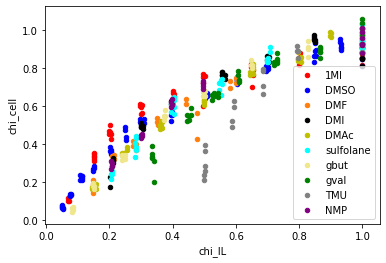

In [370]:
ax=chi1MI.plot.scatter("chi_IL","chi_cell", c='r', label='1MI')
chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', ax=ax, label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')
chisulfolane.plot.scatter("chi_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
chigbut.plot.scatter("chi_IL","chi_cell", c='khaki', ax=ax, label='gbut')
chigval.plot.scatter("chi_IL","chi_cell", c='g', ax=ax, label='gval')
chiTMU.plot.scatter("chi_IL","chi_cell", c='gray', ax=ax, label='TMU')
chiNMP.plot.scatter("chi_IL","chi_cell", c='purple', ax=ax, label='NMP')

In the paper, the equation was found to be of the form:
$$
\chi_{IL} = A \chi_{IL} + B (1 - \chi_{IL}) + C (\chi_{IL})^D (1 - \chi_{IL})^E - F \chi_{IL}^2
$$

Note that the molar fraction of hte co-solvent $\chi_{CS}$ is given by $\chi_{CS} =  (1 - \chi_{IL})$ so the constants tell you about the chemistry of teh system. 

## Exercise 4: 

Get the multivariate polynomial fits for the solvents using the equation above.. You can do all of them if you want, but at least do 1MI, DMSO, TMU, PC, DMF and DMAc. Plot the solvents and the fits. 

Which solvents are `typical' (requiring fewer fitting parameters) and whicht are `atypical' (requiring more parameters)s. 

Use the multivariate code from section [[]] and the polynomial features code from section [[]] to do this. Note that the degree parameter determines the maximum possible value of the polynomial. 

# Ridge regression - Plotting volumes

**Plan**

Introduce that plotting derrived values has striaghtend the line, maybe do the fit

Split data into two types: typical ie. DMSO and DMI and atypical: ie. TMU and 1MI

do linear regression and ridge regression on the atypical, note the larger r2 values for linear fit.

explain that ridge does regularisation which minimises the total error rather than average, this makes data more resilient to the variance in the data (I think) and avoids overfitting. 

Now test the atypical fits with the typical data, note that the typical data is better fit by ridge than normal, due to ridge ignoring the outliers in the atypical. 

Now switch, and demonstrate that as the typical has no outliers, the prediction is hte same. 

Conclude that ridge regression is better for predicting. Explain that they will be using ridge regression in hte exercise later. 

In short, ridge regression and lasso are regression techniques optimized for prediction, rather than inference.

Normal regression gives you unbiased regression coefficients (maximum likelihood estimates "as observed in the data-set").

Ridge and lasso regression allow you to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows you to use complex models and avoid over-fitting at the same time.

For both ridge and lasso you have to set a so-called "meta-parameter" that defines how aggressive regularization is performed. Meta-parameters are usually chosen by cross-validation. For Ridge regression the meta-parameter is often called "alpha" or "L2"; it simply defines regularization strength. For LASSO the meta-parameter is often called "lambda", or "L1". In contrast to Ridge, the LASSO regularization will actually set less-important predictors to 0 and help you with choosing the predictors that can be left out of the model. The two methods are combined in "Elastic Net" Regularization. Here, both parameters can be set, with "L2" defining regularization strength and "L1" the desired sparseness of results.

Here you find a nice intro t

Even though the linear model may be optimal for the data given to create the model, it is not necessarily guaranteed to be the best model for predictions on unseen data

If our underlying data follows a relatively simple model, and the model we use is too complex for the task, what we are essentially doing is we are putting too much weight on any possible change or variance in the data. Our model is overreacting and overcompensating for even the slightest change in our data. People in the field of statistics and machine learning call this phenomenon overfitting. When you have features in your dataset that are highly linearly correlated with other features, turns out linear models will be likely to overfit.

Ridge Regression, avoids over fitting by adding a penalty to models that have too large coefficients

normal linear regression minimizes the total rather than the average loss?

In [333]:
# read data into a DataFrame
vol1MI = pd.read_csv("./tutorialdata/vols1MI.csv")

volDMSO = pd.read_csv("./tutorialdata/volsDMSO.csv")
volDMI = pd.read_csv("./tutorialdata/volsDMI.csv")

volTMU = pd.read_csv("./tutorialdata/volsTMU.csv")
vol1MI.head()

,vol_frac_IL,chi_cell
0,0.131362,0.012847
1,0.132977,0.013031
2,0.262925,0.041912
3,0.266285,0.040630
4,0.264540,0.043370


### Put the data into a DataFrame

In [347]:
# Create pandas dataframe to store our X and y values
df1MI = pd.DataFrame(vol1MI)
dfDMSO = pd.DataFrame(volDMSO)

In [348]:
# Show the first five rows of our dataframe
dfDMSO.head()

,vol_frac_IL,chi_cell
0,0.113686,0.007402
1,0.111845,0.009393
2,0.111853,0.008055
3,0.165216,0.016986
4,0.161555,0.016257


### Plot the data

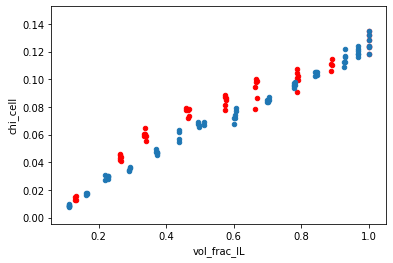

In [349]:
ax=df1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
dfDMSO.plot.scatter("vol_frac_IL", "chi_cell",ax=ax)

### Fit the data to a straight line and get the residuals

In [355]:
# instantiate the model
newmodel = LinearRegression(fit_intercept=True)
# set up fit the model to the data
newmodel.fit(df1MI[["vol_frac_IL"]], df1MI["chi_cell"])
# set up x
xfitlin = np.linspace(0, 1)
# predict y
yfitlin = newmodel.predict(xfitlin[:, np.newaxis])
newmodel.score(df1MI[["vol_frac_IL"]], df1MI["chi_cell"])

0.9380442025748845

### Plot the fit

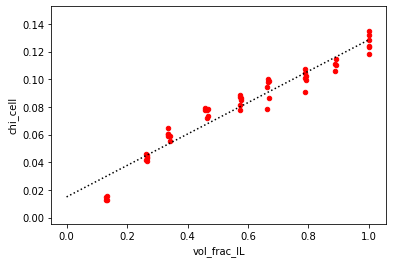

In [356]:
ax = df1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")

### Get the R2 value and set it equal to R2linear

In [357]:
R2linear = model.score(df1MI[["vol_frac_IL"]], df1MI["chi_cell"])

In [359]:
print("R2 for the linear fit is: {:.3f}".format(R2linear))

R2 for the linear fit is: 0.938


In [360]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=0.50)
clf.fit(df1MI[["vol_frac_IL"]], df1MI["chi_cell"]) 
xfitridge = np.linspace(0,1)

In [361]:
yfitridge = clf.predict(xfitridge[:, np.newaxis])

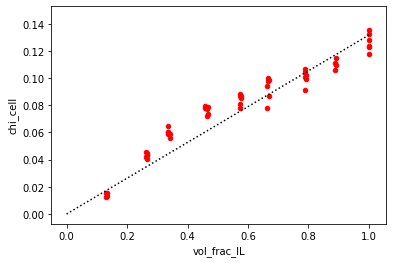

In [366]:
ax = df1MI.plot.scatter("vol_frac_IL", "chi_cell", c='red')
ax.plot(xfitridge, yfitridge, linestyle=":", color="black")

In [364]:
clf.score(df1MI[["vol_frac_IL"]], df["chi_cell"])

0.8932588001852567

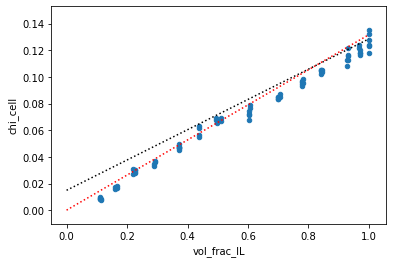

In [367]:
ax = dfDMSO.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")
ax.plot(xfitridge, yfitridge, linestyle=":", color="red")

In [369]:
print("CS\tLinear\tRidge")

print("1-MI\t{:.2f},\t {:.2f}\t".format(
    model.score(df[["vol_frac_IL"]], df["chi_cell"]),
    clf.score(df[["vol_frac_IL"]], df["chi_cell"])))

print("DMSO\t{:.2f},\t {:.2f}\t".format(
    model.score(dfDMSO[["vol_frac_IL"]], dfDMSO["chi_cell"]),
    clf.score(dfDMSO[["vol_frac_IL"]], dfDMSO["chi_cell"])))


CS	Linear	Ridge
1-MI	0.94,	 0.89	
DMSO	0.93,	 0.97	


So, by using the correct regularisation, we can get a decent set of fits to the typical data from the atypical data. This is because this method is less sensitive to outlyters (and the outlyers are what makes the datasets atypical). 

## Exercise 5. 
See what happens when you use the linear and ridge regression methods on a typical dissolution curve and then apply those fits to the atypical data.  

# Phew!

Well done if you've got to this bit.

To recap you've 

adsfmsal;djfml; iwe 